# Data Science and Business Intern

# Author: Himani Sharma

# Importing Libraries

In [113]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn import metrics 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

# Loading and preprocessing data

In [3]:
# Data from  2001-01-01 to 2020-06-30                      
headlines_dataset=pd.read_csv("india-news-headlines.csv")
# Printing the shape and length of dataset
print ("Dataset Length: ", len(headlines_dataset)) 
print ("Dataset Shape: ", headlines_dataset.shape) 
      
# Printing the first 5 rows of dataset  
print ("Dataset: \n",headlines_dataset.head())
print ("Dataset: \n",headlines_dataset.tail()) 
    
#check for null values 
isnull=headlines_dataset.isnull().values.any()
print("\nIf there is any missing value, print True else False: ",isnull)

Dataset Length:  3297172
Dataset Shape:  (3297172, 3)
Dataset: 
    publish_date headline_category  \
0      20010101        sports.wwe   
1      20010102           unknown   
2      20010102           unknown   
3      20010102           unknown   
4      20010102           unknown   

                                       headline_text  
0  win over cena satisfying but defeating underta...  
1  Status quo will not be disturbed at Ayodhya; s...  
2                Fissures in Hurriyat over Pak visit  
3              America's unwanted heading for India?  
4                 For bigwigs; it is destination Goa  
Dataset: 
          publish_date                 headline_category  \
3297167      20200630                      gadgets-news   
3297168      20200630     entertainment.hindi.bollywood   
3297169      20200630     entertainment.hindi.bollywood   
3297170      20200630     entertainment.hindi.bollywood   
3297171      20200630  entertainment.telugu.movies.news   

                

We will check for null values in historic dataset , and replace them with mean value of the column

In [4]:
# Data from  2001-01-01 to 2020-06-30                    

historic_dataset=pd.read_csv("RELIANCE.NS.csv")
# Printing the shape and length of dataset
print ("Dataset Length: ", len(historic_dataset)) 
print ("Dataset Shape: ", historic_dataset.shape) 
      
# Printing the first 5 rows of dataset  
print ("Dataset: \n",historic_dataset.head())
print ("Dataset: \n",historic_dataset.tail()) 
    
#check for null values 
isnull=historic_dataset.isnull().values.any()
print("\nIf there is any missing value, print True else False: ",isnull)

count_nan_in_df = historic_dataset.isnull().sum().sum()
print("\nNumber of missing values in dataset is: ",count_nan_in_df)
historic_dataset['Open'].fillna((historic_dataset['Open'].mean()), inplace=True)
historic_dataset['High'].fillna((historic_dataset['High'].mean()), inplace=True)
historic_dataset['Low'].fillna((historic_dataset['Low'].mean()), inplace=True)
historic_dataset['Close'].fillna((historic_dataset['Adj Close'].mean()), inplace=True)
historic_dataset['Adj Close'].fillna((historic_dataset['Open'].mean()), inplace=True)
historic_dataset['Volume'].fillna((historic_dataset['Volume'].mean()), inplace=True)

isnull=historic_dataset.isnull().values.any()
print("\nIf there are any missing values after replacement by mean, print True else False  : ",isnull)

historic_dataset.Date.isnull().values.any()

Dataset Length:  4869
Dataset Shape:  (4869, 7)
Dataset: 
          Date       Open       High        Low      Close  Adj Close  \
0  2001-01-01  53.105499  53.675701  52.949402  53.378899  24.208828   
1  2001-01-02  53.160198  56.073200  53.144600  55.339100  25.097834   
2  2001-01-03  55.448399  56.494900  55.136101  56.237202  25.505148   
3  2001-01-04  56.088799  57.307098  55.635899  55.885799  25.345785   
4  2001-01-05  55.682701  57.291500  55.682701  56.901001  25.806200   

       Volume  
0  19259768.0  
1  42408935.0  
2  56622894.0  
3  38303310.0  
4  47762434.0  
Dataset: 
             Date         Open         High          Low        Close  \
4864  2020-06-23  1750.000000  1763.750000  1716.099976  1720.900024   
4865  2020-06-24  1735.900024  1772.699951  1711.699951  1727.849976   
4866  2020-06-25  1727.000000  1749.000000  1713.050049  1717.900024   
4867  2020-06-26  1728.800049  1752.000000  1717.000000  1741.650024   
4868  2020-06-29  1728.050049  1739.75000

False

Important thing to note is that the market is closed on weekends and public holidays.
The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider 
the closing price as the target variable. Let’s plot the target variable to understand how it’s shaping up in our data:

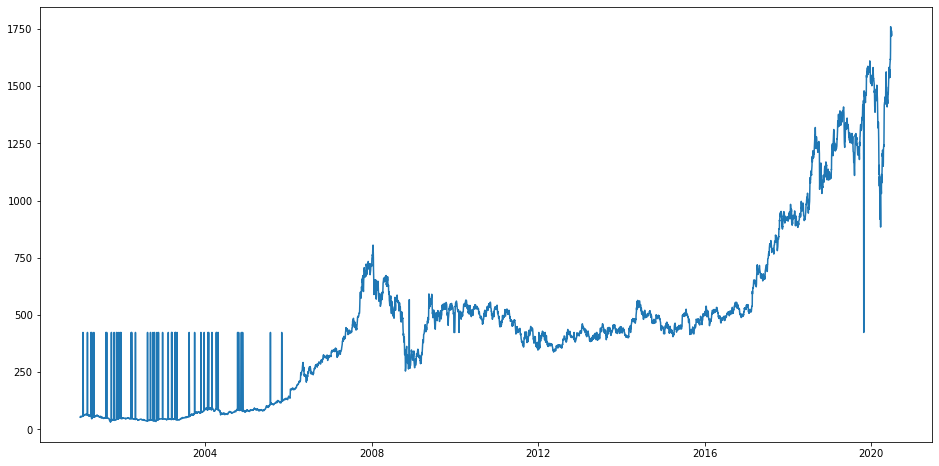

In [5]:
#plot
historic_dataset.index=pd.to_datetime(historic_dataset['Date'],format='%Y-%m-%d')
plt.figure(figsize=(16,8))
plt.plot(historic_dataset['Close'], label='Close Price history')
plt.show()

# Sentiment Analysis

# Function to tokanize, remove stopwords

In [6]:
def process_text(headline):
    stop_words = stopwords.words('english')
    tokens = []
    result=""
    toks = word_tokenize(headline)
    for t in toks :
        if t.lower() not in stop_words:
            result+=" "+t.lower()
    
    
    return result

# Function to calculate polarity score

In [7]:
def polarity_score_fun(headline):
    sia = SIA()
    pol_score = sia.polarity_scores(headline)
    return pol_score

Collecting headlines for each unique date and tokenizing them.
Then calculating their polarity scores.

In [8]:
headlines_dataset
dates=headlines_dataset.publish_date.unique() 
    
dates_historic_data=historic_dataset.Date
plarity_scores_datewise=[]


for date in dates:
    
    if str(date)[:4]+"-"+str(date)[4:6]+"-"+str(date)[6:] in dates_historic_data:
        s=pd.DataFrame(headlines_dataset.loc[headlines_dataset['publish_date'] == date, 'headline_text'])
        headlines=""
        for index, row in s.iterrows():
            headlines+=row['headline_text']+". " 
        tokens=process_text(headlines)
        polarity_score=polarity_score_fun(tokens)['compound']
        plarity_scores_datewise.append(polarity_score)
        


In [45]:
print (type(dates[0]))
print (type(dates_historic_data[0]))

index=[]
i=0
new_dates_historic_data=[]
for date in dates_historic_data:
    if int(date[:4]+date[5:7]+date[8:]) not in dates:
        index.append(i)
    else:
        new_dates_historic_data.append(date)
    i+=1
    
print("Indexes of Dates missing in headlines_dataset\n",index)

<class 'numpy.int64'>
<class 'str'>
Indexes of Dates missing in headlines_dataset
 [9, 10, 11, 12, 13, 14, 15, 36, 46, 47, 48, 50, 65, 66, 85, 100, 102, 103, 108, 112, 114, 115, 116, 117, 118, 119, 120, 121, 132]


In [46]:
new_dataset = pd.DataFrame()
new_dataset['Date']=new_dates_historic_data
new_dataset['Polarity_score']=plarity_scores_datewise
new_dataset.head()

,Date,Polarity_score
0,2001-01-01,0.6369
1,2001-01-02,-0.9701
2,2001-01-03,0.4696
3,2001-01-04,0.7358
4,2001-01-05,0.9841


In [47]:
historic_dataset.index.name = None
historic_dataset = historic_dataset.rename_axis(None)

In [71]:
df = pd.merge(new_dataset,historic_dataset,on='Date', how='left')
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Polarity_score,Open,High,Low,Close,Adj Close,Volume
0,2001-01-01,0.6369,53.105499,53.675701,52.949402,53.378899,24.208828,19259768.0
1,2001-01-02,-0.9701,53.160198,56.073200,53.144600,55.339100,25.097834,42408935.0
2,2001-01-03,0.4696,55.448399,56.494900,55.136101,56.237202,25.505148,56622894.0
3,2001-01-04,0.7358,56.088799,57.307098,55.635899,55.885799,25.345785,38303310.0
4,2001-01-05,0.9841,55.682701,57.291500,55.682701,56.901001,25.806200,47762434.0
...,...,...,...,...,...,...,...,...
4835,2020-06-23,-0.9998,1750.000000,1763.750000,1716.099976,1720.900024,1714.462524,17519493.0
4836,2020-06-24,-0.9997,1735.900024,1772.699951,1711.699951,1727.849976,1721.386475,23807033.0
4837,2020-06-25,-0.9999,1727.000000,1749.000000,1713.050049,1717.900024,1711.473755,18312025.0
4838,2020-06-26,-0.9998,1728.800049,1752.000000,1717.000000,1741.650024,1735.134888,14270458.0


In [72]:
# 
highs = df['High']
list_of_highs = highs.to_list()
list_of_highs.pop()
list_of_highs.insert(0,0)
df['High']=list_of_highs

lows = df['Low']
list_of_lows = lows.to_list()
list_of_lows.pop()
list_of_lows.insert(0,0)
df['Low']=list_of_lows

volumes = df['Volume']
list_of_volumes = volumes.to_list()
list_of_volumes.pop()
list_of_volumes.insert(0,0)
df['Volume']=list_of_volumes

adj_close = df['Adj Close']
list_of_adj_close = adj_close.to_list()
list_of_adj_close.pop()
list_of_adj_close.insert(0,0)
df['Adj Close']=list_of_adj_close


df.head(10)


,Date,Polarity_score,Open,High,Low,Close,Adj Close,Volume
0,2001-01-01,0.6369,53.105499,0.000000,0.000000,53.378899,0.000000,0.0
1,2001-01-02,-0.9701,53.160198,53.675701,52.949402,55.339100,24.208828,19259768.0
2,2001-01-03,0.4696,55.448399,56.073200,53.144600,56.237202,25.097834,42408935.0
3,2001-01-04,0.7358,56.088799,56.494900,55.136101,55.885799,25.505148,56622894.0
4,2001-01-05,0.9841,55.682701,57.307098,55.635899,56.901001,25.345785,38303310.0
5,2001-01-08,-0.9709,56.619900,57.291500,55.682701,56.260601,25.806200,47762434.0
6,2001-01-09,-0.9941,56.135700,57.393002,55.799900,55.909199,25.515766,43809518.0
7,2001-01-10,-0.7096,56.002899,56.510601,55.776501,54.932999,25.356398,28898145.0
8,2001-01-11,0.0000,55.057999,56.455898,54.534698,55.573399,24.913660,30288075.0
9,2001-01-23,0.8994,58.533199,55.807701,54.823700,59.611000,25.204098,26062495.0


# Creating the models

We are creating 4 models.

In [182]:
reg1 = RandomForestRegressor(n_estimators=200, random_state=0)
reg2 = GradientBoostingRegressor(random_state=0)
reg3 = DecisionTreeRegressor(random_state=0)
ereg = VotingRegressor([ ('rf', reg1),('gb', reg2),('dt',reg3)])

# Function to train models 

In [195]:
def train(X_train, y_train):
    reg1.fit(X_train, y_train)
    reg2.fit(X_train, y_train)
    reg3.fit(X_train, y_train)
    ereg.fit(X_train, y_train)
    print("Models trained successfully")

# Function for each of the regressors to make the 20 first predictions

In [196]:
def pred(X_test):
    test_X = X_test[:20]
    test_y=y_test[:20]

    pred1 = reg1.predict(test_X)
    pred2 = reg2.predict(test_X)
    pred3 = reg3.predict(test_X)
    pred4 = ereg.predict(test_X)
    return([pred1,pred2,pred3,pred4])

# Function for Plotting the prediction results

In [197]:
def plot(pred1,pred2,pred3,pred4):
    
    plt.figure()
    plt.plot(pred1, 'ys', label='RandomForestRegressor')
    plt.plot(pred2, 'b^', label='GradientBoostingRegresso')
    plt.plot(pred3, 'gd', label='DecisionTreeRegressor')
    plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')

    plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
    plt.ylabel('predicted')
    plt.xlabel('training samples')
    plt.legend(loc="best")
    plt.title('Regressor predictions and their average')

    plt.show()

# Function for calculating R2 Score and Mean Absolute error

In [198]:
def R2_score_MeanAbs_Error(Model,reg,test_y,pred):
    print("r2 score for Random Forest Regressor: ",reg.score(X_train, y_train))
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred)) 

# Training the data with Polarity Score

In [209]:
subject_var=df[['Polarity_score']]
X = subject_var.values[:,:]

#Target/Label variable
target_vars=df['Close']
Y = target_vars.values[:]


X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100) 
train(X_train, y_train)



Models trained successfully


In [214]:
pred_list=pred(X_test)
pred1=pred_list[0]
pred2=pred_list[1]
pred3=pred_list[2]
pred4=pred_list[3]

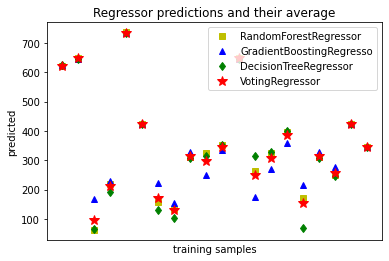

In [215]:
plot(pred1,pred2,pred3,pred4)


In [216]:
R2_score_MeanAbs_Error("RandomForestRegressor",reg1,test_y,pred1)
R2_score_MeanAbs_Error("GradientBoostingRegressor",reg2,test_y,pred2)
R2_score_MeanAbs_Error("DecisionTreeRegressor",reg3,test_y,pred3)
R2_score_MeanAbs_Error("VotingRegressor",ereg,test_y,pred4)

r2 score for Random Forest Regressor:  0.35002468665603914
Mean Absolute Error: 242.73157958747817
r2 score for Random Forest Regressor:  0.3240073351504118
Mean Absolute Error: 244.32784098455386
r2 score for Random Forest Regressor:  0.3587368885936174
Mean Absolute Error: 244.1331224413866
r2 score for Random Forest Regressor:  0.35090317327930776
Mean Absolute Error: 241.6216541272416


# Training the data with Polarity Score and opening Price of the day

In [217]:
subject_var=df[['Polarity_score','Open']]
X = subject_var.values[:,:]

#Target/Label variable
target_vars=df['Close']
Y = target_vars.values[:]


X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100) 
train(X_train, y_train)


Models trained successfully


In [218]:
pred_list=pred(X_test)
pred1=pred_list[0]
pred2=pred_list[1]
pred3=pred_list[2]
pred4=pred_list[3]

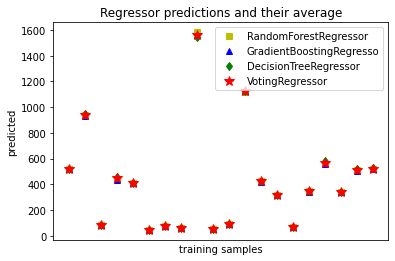

In [219]:
plot(pred1,pred2,pred3,pred4)


In [220]:
R2_score_MeanAbs_Error("RandomForestRegressor",reg1,test_y,pred1)
R2_score_MeanAbs_Error("GradientBoostingRegressor",reg2,test_y,pred2)
R2_score_MeanAbs_Error("DecisionTreeRegressor",reg3,test_y,pred3)
R2_score_MeanAbs_Error("VotingRegressor",ereg,test_y,pred4)

r2 score for Random Forest Regressor:  0.9997974817606783
Mean Absolute Error: 11.424221099921315
r2 score for Random Forest Regressor:  0.9992901434749736
Mean Absolute Error: 9.428562568687415
r2 score for Random Forest Regressor:  0.9999753705922496
Mean Absolute Error: 11.64556000000001
r2 score for Random Forest Regressor:  0.9998118045159659
Mean Absolute Error: 10.681538124295272


# Observations

Polarity as the only feature comes out as a non dominant feautre. But when combined with Opening stock price of the day, it gives excellent results.


# Scope of improvement:

1.Using better improved methods of polarity_score decision for sentiment analysis of news.
2.Hyperparameters tuning of the models will improve the model.